In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/processed_data_4day.csv')

In [7]:
data.head()

,Date,CPI,IndexValue_NDXT,NetChange_NDXT,High_NDXT,Low_NDXT,Close/Last_GOOGL,Volume_GOOGL,Open_GOOGL,High_GOOGL,Low_GOOGL,Close/Last_AAPL,Volume_AAPL,Open_AAPL,High_AAPL,Low_AAPL
0,2015-03-16,236.599,2384.351959,34.024568,2385.589570,2362.563697,28.08200,36818620.0,30.97000,28.1875,27.5660,31.2375,143265200.0,30.97000,31.2375,30.7175
1,2015-03-20,236.599,2431.813822,24.085556,2438.290063,2419.281267,28.24750,44255280.0,32.06250,28.3550,28.2240,32.1000,274064720.0,32.06250,32.1000,31.2900
2,2015-03-24,236.599,2401.919857,-16.423713,2422.963888,2401.826579,28.87700,79040060.0,31.80750,29.0940,28.4045,32.0100,130988800.0,31.80750,32.0100,31.6400
3,2015-03-28,236.599,2372.316084,-13.033901,2385.998228,2363.860982,28.17575,58884350.0,31.50625,28.5095,27.8530,31.6450,146420680.0,31.50625,31.6450,31.2075
4,2015-04-01,236.599,2342.712311,-9.644089,2349.032568,2325.895386,27.47450,38728640.0,31.20500,27.9250,27.3015,31.2800,161852560.0,31.20500,31.2800,30.7750


In [8]:
data.shape

(913, 16)

In [10]:
dataNew = data.drop(['Date'], axis=1)
dataNew.head()

,CPI,IndexValue_NDXT,NetChange_NDXT,High_NDXT,Low_NDXT,Close/Last_GOOGL,Volume_GOOGL,Open_GOOGL,High_GOOGL,Low_GOOGL,Close/Last_AAPL,Volume_AAPL,Open_AAPL,High_AAPL,Low_AAPL
0,236.599,2384.351959,34.024568,2385.589570,2362.563697,28.08200,36818620.0,30.97000,28.1875,27.5660,31.2375,143265200.0,30.97000,31.2375,30.7175
1,236.599,2431.813822,24.085556,2438.290063,2419.281267,28.24750,44255280.0,32.06250,28.3550,28.2240,32.1000,274064720.0,32.06250,32.1000,31.2900
2,236.599,2401.919857,-16.423713,2422.963888,2401.826579,28.87700,79040060.0,31.80750,29.0940,28.4045,32.0100,130988800.0,31.80750,32.0100,31.6400
3,236.599,2372.316084,-13.033901,2385.998228,2363.860982,28.17575,58884350.0,31.50625,28.5095,27.8530,31.6450,146420680.0,31.50625,31.6450,31.2075
4,236.599,2342.712311,-9.644089,2349.032568,2325.895386,27.47450,38728640.0,31.20500,27.9250,27.3015,31.2800,161852560.0,31.20500,31.2800,30.7750


In [6]:
significance_threshold = 0.05
stationary_list=[] #0 is false 1 is true
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for c in dataNew.columns:
  unittest = sm.tsa.stattools.adfuller(dataNew[c])
  print(c, unittest) # use the ADfuller test that we tried in class - that notebook is here  https://github.com/fedhere/MLTSA_FBianco/blob/main/CodeExamples/ARMA/testingARMA_ARIMA.ipynb
  print(f"statistics value: {unittest[0]}")
  print(f"p-value: {unittest[1]}")
  print(f"is p-value < {significance_threshold}? {unittest[1]<significance_threshold}")
  print(f"\nis there a unit test? {unittest[1]>=significance_threshold}")
  print(f"\nis it stationary? {unittest[1]<significance_threshold}")
  if unittest[1]<significance_threshold:
    stationary_list.append(1)
  else:
    stationary_list.append(0)

stationary_list

Stationarity results from the AD Fuller test at a p-value of 0.05
CPI (0.3395782851745869, 0.9790892028903914, 21, 891, {'1%': -3.437710538229776, '5%': -2.864789273176045, '10%': -2.568500137640276}, -2868.0286666149605)
statistics value: 0.3395782851745869
p-value: 0.9790892028903914
is p-value < 0.05? False

is there a unit test? True

is it stationary? False
IndexValue_NDXT (-0.5049233629272085, 0.8910521490327702, 9, 903, {'1%': -3.43761244359048, '5%': -2.8647460220589736, '10%': -2.568477099382028}, 11296.971260324643)
statistics value: -0.5049233629272085
p-value: 0.8910521490327702
is p-value < 0.05? False

is there a unit test? True

is it stationary? False
NetChange_NDXT (-5.747435840185779, 6.075358197049164e-07, 21, 891, {'1%': -3.437710538229776, '5%': -2.864789273176045, '10%': -2.568500137640276}, 10622.05451526612)
statistics value: -5.747435840185779
p-value: 6.075358197049164e-07
is p-value < 0.05? True

is there a unit test? False

is it stationary? True
High_NDXT (

[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]

In [7]:
def getPandQ(dataColumn, indOfQuant):
  iValue = stationary_list[indOfQuant-1]
  aics = np.zeros((10,10))
  for p in range(10):
      for q in range(10):
        try:
            mod = sm.tsa.ARIMA(dataColumn, order=(p,iValue,q))
            mod = mod.fit()
            #print(mod)
            aics[p][q] = mod.aic

        except:
            aics[p][q] = np.nan

  p,q = np.where(aics == np.nanmin(aics))
  return p[0], q[0]

In [ ]:
colNames = data.columns
print(colNames)

In [ ]:
print(getPandQ(data['IndexValue_NDXT'],2))

In [ ]:
def getARIMAPredict(indOfQuant):
  # no forecasting here (i.e. not like the HW we did)

  column_name = colNames[indOfQuant]

  # manually putting in p and q values from past trials to save time  
  # if column_name == 'IndexValue_NDXT':
  #     p = 14
  #     q = 5
  # if column_name == 'Volume_GOOGL':
  #     p = 8
  #     q = 9
  # if column_name == 'Volume_AAPL':
  #     p = 9
  #     q = 1
  # if column_name == 'CPI':
  #     p = 2
  #     q = 0
  # if column_name == 'High_GOOGL':
  #     p = 11
  #     q = 5
  # if column_name == 'High_AAPL':
  #     p = 3
  #     q = 4
  # if column_name == 'NetChange_NDXT':
  #     p = 2
  #     q = 3
  # if column_name == 'High_NDXT':
  #     p = 15
  #     q = 8
  # if column_name == 'Low_NDXT':
  #     p = 14
  #     q = 5
  # if column_name == 'Close/Last_GOOGL':
  #     p = 17
  #     q = 8
  # if column_name == 'Open_GOOGL':
  #     p = 9
  #     q = 9
  # if column_name == 'Low_GOOGL':
  #     p = 7
  #     q = 6
  # if column_name == 'Close/Last_AAPL':
  #     p = 3
  #     q = 4
  # if column_name == 'Open_AAPL':
  #     p = 9
  #     q = 9
  # if column_name == 'Low_AAPL':
  #     p = 15
  #     q = 5
      
  # p, q = getPandQ(data_reversed[column_name], indOfQuant)
  # p = 15
  # q = 8
  p,q = getPandQ(data[column_name], indOfQuant)
  i = stationary_list[indOfQuant-1]

  print("information for " + str(column_name))
  arima_model = sm.tsa.ARIMA(data[column_name], order=(p, i, q))
  model_fit = arima_model.fit()
  print(model_fit.summary())

  prediction = model_fit.predict(start = 1, end=len(data[column_name]))

  plt.plot(data['Date'], data[column_name], label='data')
  plt.plot(data['Date'], prediction, ls = '--', color = 'tab:purple', label='prediction')
  plt.title(column_name)
  plt.xlabel('Date')
  plt.ylabel(column_name)
  plt.legend()
  plt.show()

  residual = data[column_name] - prediction

  plt.plot(data['Date'], residual[1:], label = 'residual')
  plt.title('Residual Plot')
  plt.xlabel('Date')
  plt.ylabel('Residual')
  plt.show()


  return prediction, residual

In [ ]:
colNames = data.columns
print(colNames)

In [ ]:
"""
ind_highNDXT = np.where(colNames == 'High_NDXT')[0][0]
ind_highGoog = np.where(colNames == 'High_GOOGL')[0][0]

indInterestList = [ind_highNDXT, ind_highGoog]
headerList = ['High_NDXT', 'High_GOOGL']

print(indInterestList)

"""

ind_NDXT = np.where(colNames == 'IndexValue_NDXT')[0][0]
ind_volGoog = np.where(colNames == 'Volume_GOOGL')[0][0]
ind_volApp = np.where(colNames == 'Volume_AAPL')[0][0]
ind_CPI = np.where(colNames == 'CPI')[0][0]
ind_highGoog = np.where(colNames == 'High_GOOGL')[0][0]
ind_highApp = np.where(colNames == 'High_AAPL')[0][0]

ind_NetChange_NDXT = np.where(colNames == 'NetChange_NDXT')[0][0]
ind_High_NDXT	= np.where(colNames == 'High_NDXT')[0][0]
ind_Low_NDXT	= np.where(colNames == 'Low_NDXT')[0][0]
ind_CloseLast_GOOGL	= np.where(colNames == 'Close/Last_GOOGL')[0][0]
ind_Open_GOOGL	= np.where(colNames == 'Open_GOOGL')[0][0]
ind_Low_GOOGL	= np.where(colNames == 'Low_GOOGL')[0][0]
ind_CloseLast_AAPL	= np.where(colNames == 'Close/Last_AAPL')[0][0]
ind_Open_AAPL	= np.where(colNames == 'Open_AAPL')[0][0]
ind_Low_AAPL = np.where(colNames == 'Low_AAPL')[0][0]

indInterestList = [ind_NDXT, ind_volGoog, ind_volApp, ind_CPI, ind_highGoog, ind_highApp, ind_NetChange_NDXT, ind_High_NDXT, ind_Low_NDXT, ind_CloseLast_GOOGL, ind_Open_GOOGL, ind_Low_GOOGL, ind_CloseLast_AAPL, ind_Open_AAPL, ind_Low_AAPL]
headerList = ['IndexValue_NDXT', 'Volume_GOOGL', 'Volume_AAPL', 'CPI', 'High_GOOGL', 'High_AAPL', 'NetChange_NDXT', 'High_NDXT', 'Low_NDXT', 'Close/Last_GOOGL', 'Open_GOOGL', 'Low_GOOGL', 'Close/Last_AAPL', 'Open_AAPL', 'Low_AAPL']

print(len(indInterestList))
print(len(headerList))

In [ ]:
resArray = np.zeros((len(data['Date'])+1, len(indInterestList)))
predArray = np.zeros((len(data['Date']), len(indInterestList)))


# testing
# res1 = getARIMAPredict(indInterestList[0])

for i in range(len(indInterestList)):
    result_prediction, result_residual = getARIMAPredict(indInterestList[i])
    resArray[:,i] = result_residual
    predArray[:,i] = result_prediction

In [ ]:
headerString = 'IndexValue_NDXT, Volume_GOOGL,Volume_AAPL,CPI,High_GOOGL,High_AAPL, NetChange_NDXT, High_NDXT, Low_NDXT, Close/Last_GOOGL, Open_GOOGL, Low_GOOGL, Close/Last_AAPL, Open_AAPL, Low_AAPL'

In [ ]:
np.savetxt("selectResidualsFinal_4day.csv", resArray, delimiter = ",", header = headerString)
np.savetxt("selectPredictionsFinal_4day.csv", predArray, delimiter = ",", header = headerString)

## Create a bad version of ARIMA so the residuals will have more structure

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_csv('https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/processed_data_4day.csv')

information for IndexValue_NDXT
                               SARIMAX Results                                
Dep. Variable:        IndexValue_NDXT   No. Observations:                  913
Model:                 ARIMA(2, 5, 0)   Log Likelihood               -6879.146
Date:                Tue, 13 May 2025   AIC                          13764.293
Time:                        20:25:48   BIC                          13778.727
Sample:                             0   HQIC                         13769.804
                                - 913                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2061      0.018    -68.078      0.000      -1.241      -1.171
ar.L2         -0.6015      0.018    -32.852      0.000      -0.637      -0.566
sigma2      2.233e+0

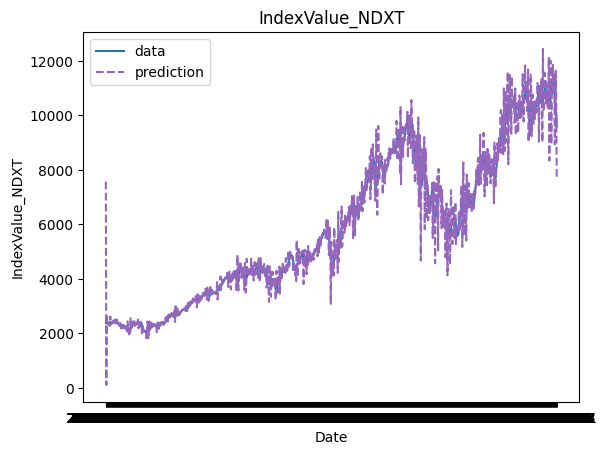

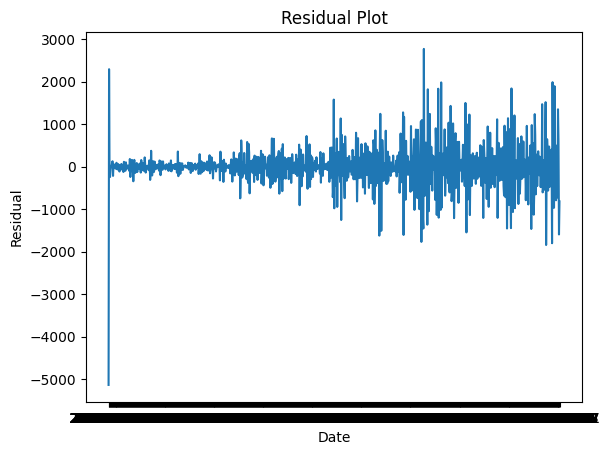

In [32]:
column_name = 'IndexValue_NDXT'

p,q = 2,0
i = 5

print("information for " + str(column_name))
arima_model = sm.tsa.ARIMA(data[column_name], order=(p, i, q))
model_fit = arima_model.fit()
print(model_fit.summary())

prediction = model_fit.predict(start = 1, end=len(data[column_name]))

plt.plot(data['Date'], data[column_name], label='data')
plt.plot(data['Date'], prediction, ls = '--', color = 'tab:purple', label='prediction')
plt.title(column_name)
plt.xlabel('Date')
plt.ylabel(column_name)
plt.legend()
plt.show()

residual = data[column_name] - prediction

plt.plot(data['Date'], residual[1:], label = 'residual')
plt.title('Residual Plot')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()

In [33]:
dat = {'Date':data['Date'], 'IndexValue_NDXT':data['IndexValue_NDXT'], 'prediction':prediction,'residuals':residual}
df = pd.DataFrame(dat)

df.to_csv('pred_and_resid_BAD.csv')